## Compare difference between ERA5 and ERA-Interim for ENSO events, based on ONI

### Use the 1x1 grid to make comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import xarray as xr
import cartopy.crs as ccrs
import plot_func as f

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#path = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/'
path = '/Users/johannemehren/filer/'

#path_remap = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/remap/'

ds = xr.open_dataset(path + 'FULL-ERA5.monthmean.2007-2018.concat_new.nc')
ds2 = xr.open_dataset(path + 'erai.tp.monmean.gridera.nc')

In [4]:
era5_trop = ds.sel(lat=slice(-30,30))
erai_trop = ds2.sel(lat=slice(-30,30), time=slice('2006-01-01', '2018-12-31'))

In [5]:
nina07_era5 = era5_trop.sel(time=slice('2007-10-01', '2008-03-01'))
nina10_era5 = era5_trop.sel(time=slice('2010-10-01', '2011-03-01'))
nina17_era5 = era5_trop.sel(time=slice('2017-10-01', '2018-03-01'))

nino09_era5 = era5_trop.sel(time=slice('2009-10-01', '2010-03-01'))
nino15_era5 = era5_trop.sel(time=slice('2015-10-01', '2016-03-01'))

neau_era5 = era5_trop.sel(time=slice('2012-10-01', '2014-11-01'))

In [6]:
nina07_erai = erai_trop.sel(time=slice('2007-10-01', '2008-03-01'))
nina10_erai = erai_trop.sel(time=slice('2010-10-01', '2011-03-01'))
nina17_erai = erai_trop.sel(time=slice('2017-10-01', '2018-03-01'))

nino09_erai = erai_trop.sel(time=slice('2009-10-01', '2010-03-01'))
nino15_erai = erai_trop.sel(time=slice('2015-10-01', '2016-03-01'))

neau_erai = erai_trop.sel(time=slice('2012-10-01', '2014-11-01'))

In [7]:
diff_neau_14 = neau_era5.ctpt[-7:,:,:] - neau_erai.ctpt[-7:,:,:].values
diff_neau_14_lrt = neau_era5.tpt[-7:,:,:] - neau_erai.tpt[-7:,:,:].values

In [8]:
diff_nina07 = nina07_era5.ctpt[1:4,:,:] - nina07_erai.ctpt[1:4,:,:].values
diff_nina10 = nina10_era5.ctpt[0:3,:,:] - nina10_erai.ctpt[0:3,:,:].values
diff_nina17 = nina17_era5.ctpt[1:4,:,:] - nina17_erai.ctpt[1:4,:,:].values

diff_neau = neau_era5.ctpt[0:3,:,:] - neau_erai.ctpt[0:3,:,:].values
diff_neau_lrt = neau_era5.tpt[0:3,:,:] - neau_erai.tpt[0:3,:,:].values

diff_nino09 = nino09_era5.ctpt[1:4,:,:] - nino09_erai.ctpt[1:4,:,:].values
diff_nino15 = nino15_era5.ctpt[1:4,:,:] - nino15_erai.ctpt[1:4,:,:].values

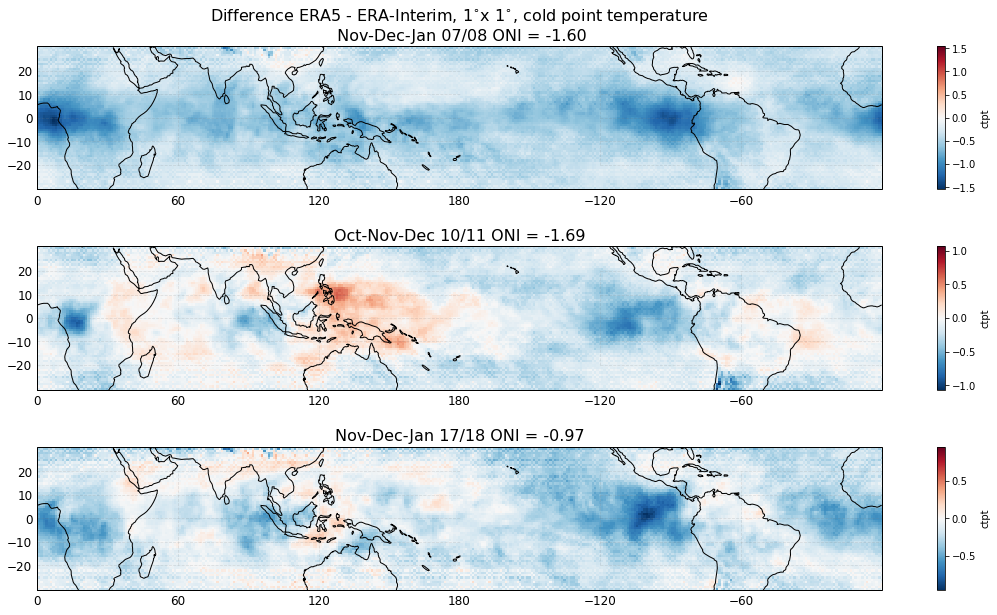

In [43]:
ds1 = diff_nina07.mean(axis=0)
ds2 = diff_nina10.mean(axis=0)
ds3 = diff_nina17.mean(axis=0)
tl1 = 'Difference ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$, cold point temperature \n Nov-Dec-Jan 07/08 ONI = -1.60'
tl2 = 'Oct-Nov-Dec 10/11 ONI = -1.69'
tl3 = 'Nov-Dec-Jan 17/18 ONI = -0.97'
vmin2 = -1
vmax2 = 1

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, enso=True)

#r.savefig('diff_era5-erai_cpt_la_07-10-17.png')

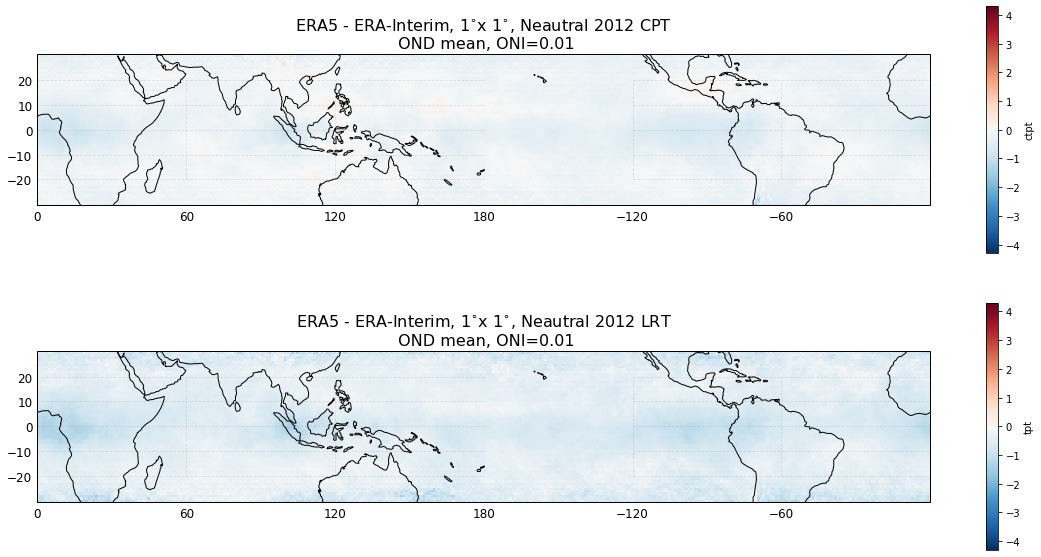

In [44]:
neau1_cpt = diff_neau.mean(axis=0)
neau1_lrt = diff_neau_lrt.mean(axis=0)
tl1 = 'ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$, Neautral 2012 CPT \n OND mean, ONI=0.01'
tl2 = 'ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$, Neautral 2012 LRT \n OND mean, ONI=0.01'

rr = f.enso_maxmin(neau1_cpt, tl1, neau1_lrt, tl2, vmin=-4.3, vmax=4.3)

#rr.savefig('diff_era5-erai_cpt_lrt_neau_2012.png')


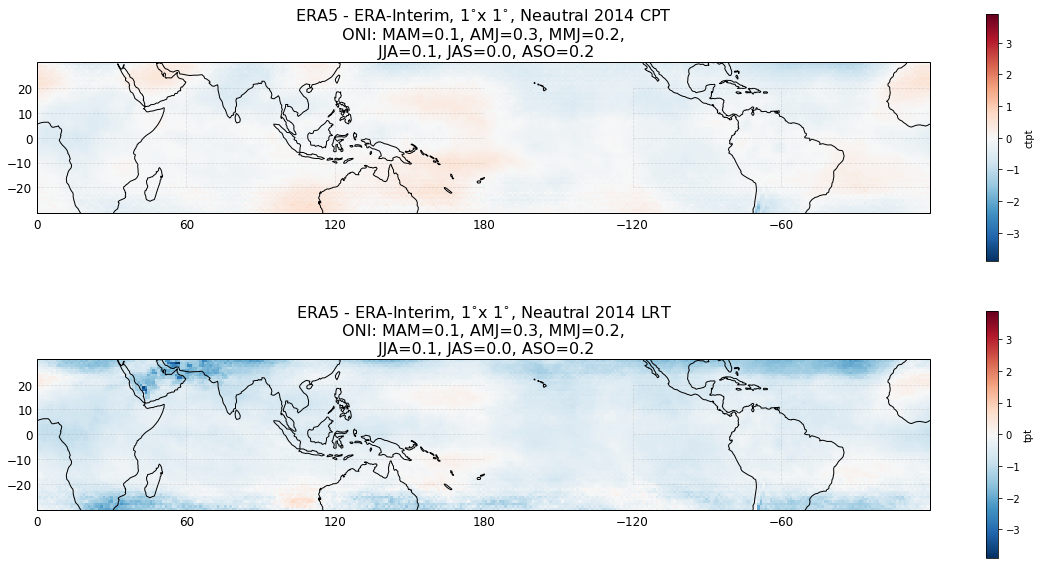

In [45]:
neau1_cpt = diff_neau_14.mean(axis=0)
neau1_lrt = diff_neau_14_lrt.mean(axis=0)
tl1 = 'ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$, Neautral 2014 CPT \n ONI: MAM=0.1, AMJ=0.3, MMJ=0.2, \n JJA=0.1, JAS=0.0, ASO=0.2'
tl2 = 'ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$, Neautral 2014 LRT \n ONI: MAM=0.1, AMJ=0.3, MMJ=0.2, \n JJA=0.1, JAS=0.0, ASO=0.2'

rr = f.enso_maxmin(neau1_cpt, tl1, neau1_lrt, tl2, vmin=-3.9, vmax=3.9)

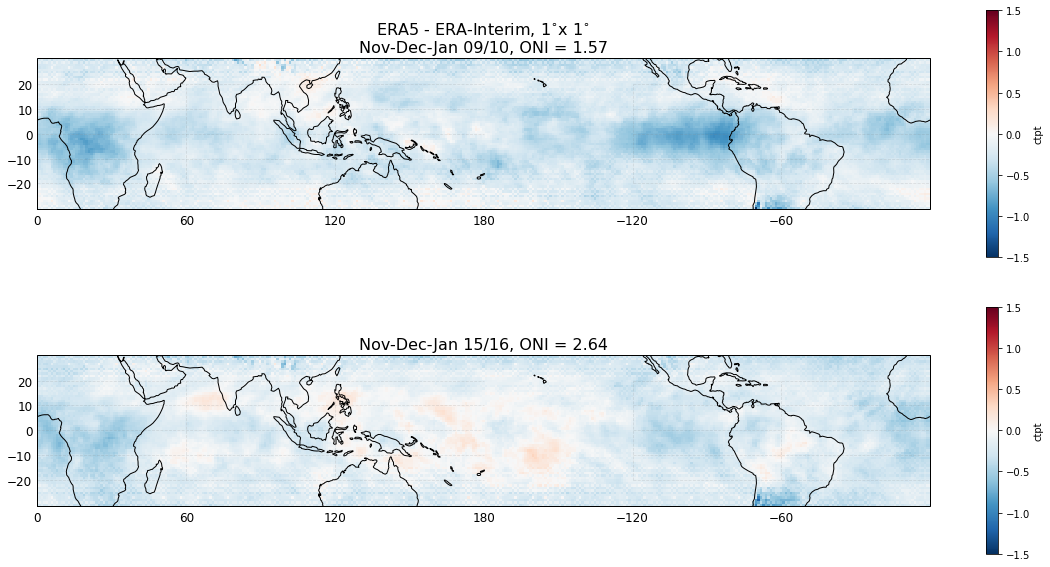

In [53]:
diff_nino09 = nino09_era5.ctpt[1:4,:,:] - nino09_erai.ctpt[1:4,:,:].values
diff_nino15 = nino15_era5.ctpt[1:4,:,:] - nino15_erai.ctpt[1:4,:,:].values

dd1 = diff_nino09.mean(axis=0)
dd2 = diff_nino15.mean(axis=0)

ttl1 = 'ERA5 - ERA-Interim, 1$^{\circ}$x 1$^{\circ}$ \nNov-Dec-Jan 09/10, ONI = 1.57'
ttl2 = 'Nov-Dec-Jan 15/16, ONI = 2.64'

siste = f.enso_maxmin(dd1, ttl1, dd2, ttl2, vmin= -1.5, vmax=1.5)

#siste.savefig('diff_era5-erai_cpt_la_09-15.png')